In [51]:
!pip install pmdarima

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
import pmdarima as pmd

In [53]:
data=pd.read_csv("/kaggle/input/analytics-vidhya-jobathon/train_IxoE5JN.csv")

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   row_id    94992 non-null  int64  
 1   datetime  94992 non-null  object 
 2   energy    93092 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.2+ MB


In [55]:
data.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [56]:
data.datetime=pd.to_datetime(data.datetime,yearfirst=True)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94992 entries, 0 to 94991
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   row_id    94992 non-null  int64         
 1   datetime  94992 non-null  datetime64[ns]
 2   energy    93092 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.2 MB


In [58]:
data.head()

,row_id,datetime,energy
0,1,2008-03-01 00:00:00,1259.985563
1,2,2008-03-01 01:00:00,1095.541500
2,3,2008-03-01 02:00:00,1056.247500
3,4,2008-03-01 03:00:00,1034.742000
4,5,2008-03-01 04:00:00,1026.334500


In [59]:
data.set_index('datetime', inplace=True)

In [60]:
data.drop('row_id', axis=1, inplace=True)

In [61]:
data.isna().sum()

energy    1900
dtype: int64

In [62]:
data=data.fillna(method='bfill')

<AxesSubplot:xlabel='datetime'>

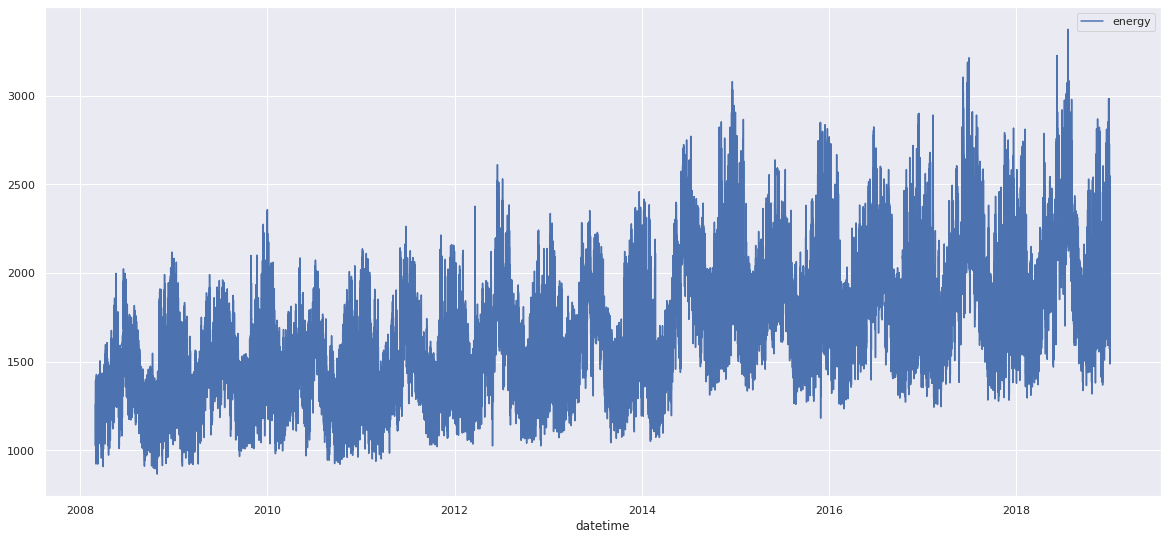

In [63]:
plt.figure(figsize=(20,9))
sns.lineplot(data=data)

In [64]:
data.tail()

,energy
datetime,
2018-12-31 19:00:00,2528.4468
2018-12-31 20:00:00,2461.8836
2018-12-31 21:00:00,2365.9944
2018-12-31 22:00:00,2342.9428
2018-12-31 23:00:00,2180.2176


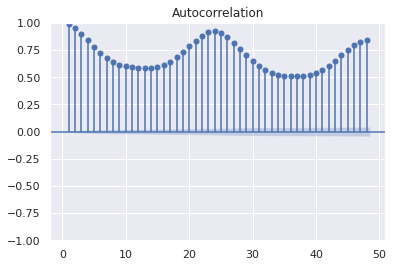

In [65]:

sm.tsa.graphics.plot_acf(data, zero=False, lags=48)
plt.show()

/opt/conda/lib/python3.7/site-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


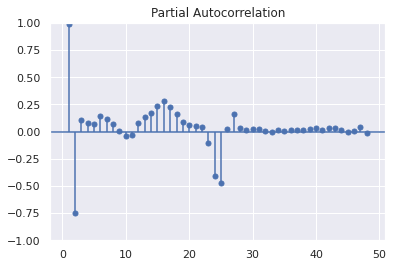

In [66]:
sm.tsa.graphics.plot_pacf(data,lags=48, zero=False)
plt.show()

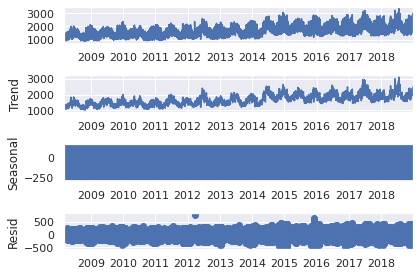

In [67]:
additive=sm.tsa.seasonal_decompose(data,model="additive" )
additive.plot()
plt.show()

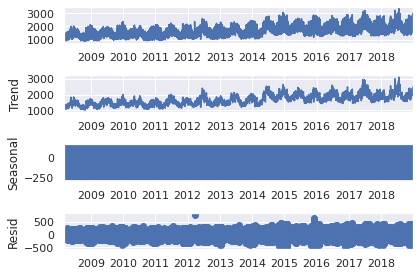

In [68]:
multiplicative=sm.tsa.seasonal_decompose(data,model="multiplicative" )
additive.plot()
plt.show()

In [80]:
#data["hour"]=data.index.hour
#data["month"]=data.index.month
#data["dow"]=data.index.day_of_week
#data["doy"]=data.index.day_of_year
from pmdarima import preprocessing
datetime_dataframe=data.reset_index()
data_feat=preprocessing.DateFeaturizer(
    column_name='datetime',  # the name of the date feature in the X matrix
    with_day_of_week=True,
    with_day_of_month=True)

_, datetime_dataframe= data_feat.fit_transform(datetime_dataframe.energy, datetime_dataframe)

In [83]:
datetime_dataframe['datetime']=data.index

In [86]:
datetime_dataframe.set_index('datetime', inplace=True)

In [91]:
datetime_dataframe['hour']=datetime_dataframe.index.hour

In [92]:
datetime_dataframe.head(48)

,energy,DATE-WEEKDAY-0,DATE-WEEKDAY-1,DATE-WEEKDAY-2,DATE-WEEKDAY-3,DATE-WEEKDAY-4,DATE-WEEKDAY-5,DATE-WEEKDAY-6,DATE-DAY-OF-MONTH,hour
datetime,,,,,,,,,,
2008-03-01 00:00:00,1259.985563,0,0,0,0,0,1,0,1,0
2008-03-01 01:00:00,1095.541500,0,0,0,0,0,1,0,1,1
2008-03-01 02:00:00,1056.247500,0,0,0,0,0,1,0,1,2
2008-03-01 03:00:00,1034.742000,0,0,0,0,0,1,0,1,3
2008-03-01 04:00:00,1026.334500,0,0,0,0,0,1,0,1,4
2008-03-01 05:00:00,1033.768500,0,0,0,0,0,1,0,1,5
2008-03-01 06:00:00,1086.780000,0,0,0,0,0,1,0,1,6
2008-03-01 07:00:00,1211.742000,0,0,0,0,0,1,0,1,7
2008-03-01 08:00:00,1293.693000,0,0,0,0,0,1,0,1,8


In [94]:
x_train=datetime_dataframe[:"2017-12-31"]
x_test=datetime_dataframe["2018-1-1":]

In [95]:
x_train

,energy,DATE-WEEKDAY-0,DATE-WEEKDAY-1,DATE-WEEKDAY-2,DATE-WEEKDAY-3,DATE-WEEKDAY-4,DATE-WEEKDAY-5,DATE-WEEKDAY-6,DATE-DAY-OF-MONTH,hour
datetime,,,,,,,,,,
2008-03-01 00:00:00,1259.985563,0,0,0,0,0,1,0,1,0
2008-03-01 01:00:00,1095.541500,0,0,0,0,0,1,0,1,1
2008-03-01 02:00:00,1056.247500,0,0,0,0,0,1,0,1,2
2008-03-01 03:00:00,1034.742000,0,0,0,0,0,1,0,1,3
2008-03-01 04:00:00,1026.334500,0,0,0,0,0,1,0,1,4
...,...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,1942.416000,0,0,0,0,0,0,1,31,19
2017-12-31 20:00:00,1894.776800,0,0,0,0,0,0,1,31,20
2017-12-31 21:00:00,1868.062000,0,0,0,0,0,0,1,31,21


In [96]:
x_test

,energy,DATE-WEEKDAY-0,DATE-WEEKDAY-1,DATE-WEEKDAY-2,DATE-WEEKDAY-3,DATE-WEEKDAY-4,DATE-WEEKDAY-5,DATE-WEEKDAY-6,DATE-DAY-OF-MONTH,hour
datetime,,,,,,,,,,
2018-01-01 00:00:00,1642.7628,1,0,0,0,0,0,0,1,0
2018-01-01 01:00:00,1463.6552,1,0,0,0,0,0,0,1,1
2018-01-01 02:00:00,1463.6552,1,0,0,0,0,0,0,1,2
2018-01-01 03:00:00,1413.1208,1,0,0,0,0,0,0,1,3
2018-01-01 04:00:00,1385.8796,1,0,0,0,0,0,0,1,4
...,...,...,...,...,...,...,...,...,...,...
2018-12-31 19:00:00,2528.4468,1,0,0,0,0,0,0,31,19
2018-12-31 20:00:00,2461.8836,1,0,0,0,0,0,0,31,20
2018-12-31 21:00:00,2365.9944,1,0,0,0,0,0,0,31,21


In [97]:
y_train=x_train['energy'].reset_index().drop("datetime",axis=1)
y_test=x_test["energy"].reset_index().drop("datetime",axis=1)

In [98]:
y_train=y_train['energy']
y_test=y_test['energy']

In [99]:
x_train=x_train.drop('energy', axis=1)
x_test=x_test.drop('energy', axis=1)

In [100]:
model=RandomForestRegressor(n_estimators=1000,random_state=42, n_jobs=-1)
model.fit(x_train,y_train)

RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=42)

In [101]:
from sklearn.metrics import r2_score 

In [102]:
predicted_train=model.predict(x_train)
predicted_test=model.predict(x_test)

In [103]:
print("train", r2_score(y_train,predicted_train))
print("test", r2_score(y_test,predicted_test))

train 0.23107266674222648
test -0.800827272064299


In [104]:
x_train

,DATE-WEEKDAY-0,DATE-WEEKDAY-1,DATE-WEEKDAY-2,DATE-WEEKDAY-3,DATE-WEEKDAY-4,DATE-WEEKDAY-5,DATE-WEEKDAY-6,DATE-DAY-OF-MONTH,hour
datetime,,,,,,,,,
2008-03-01 00:00:00,0,0,0,0,0,1,0,1,0
2008-03-01 01:00:00,0,0,0,0,0,1,0,1,1
2008-03-01 02:00:00,0,0,0,0,0,1,0,1,2
2008-03-01 03:00:00,0,0,0,0,0,1,0,1,3
2008-03-01 04:00:00,0,0,0,0,0,1,0,1,4
...,...,...,...,...,...,...,...,...,...
2017-12-31 19:00:00,0,0,0,0,0,0,1,31,19
2017-12-31 20:00:00,0,0,0,0,0,0,1,31,20
2017-12-31 21:00:00,0,0,0,0,0,0,1,31,21


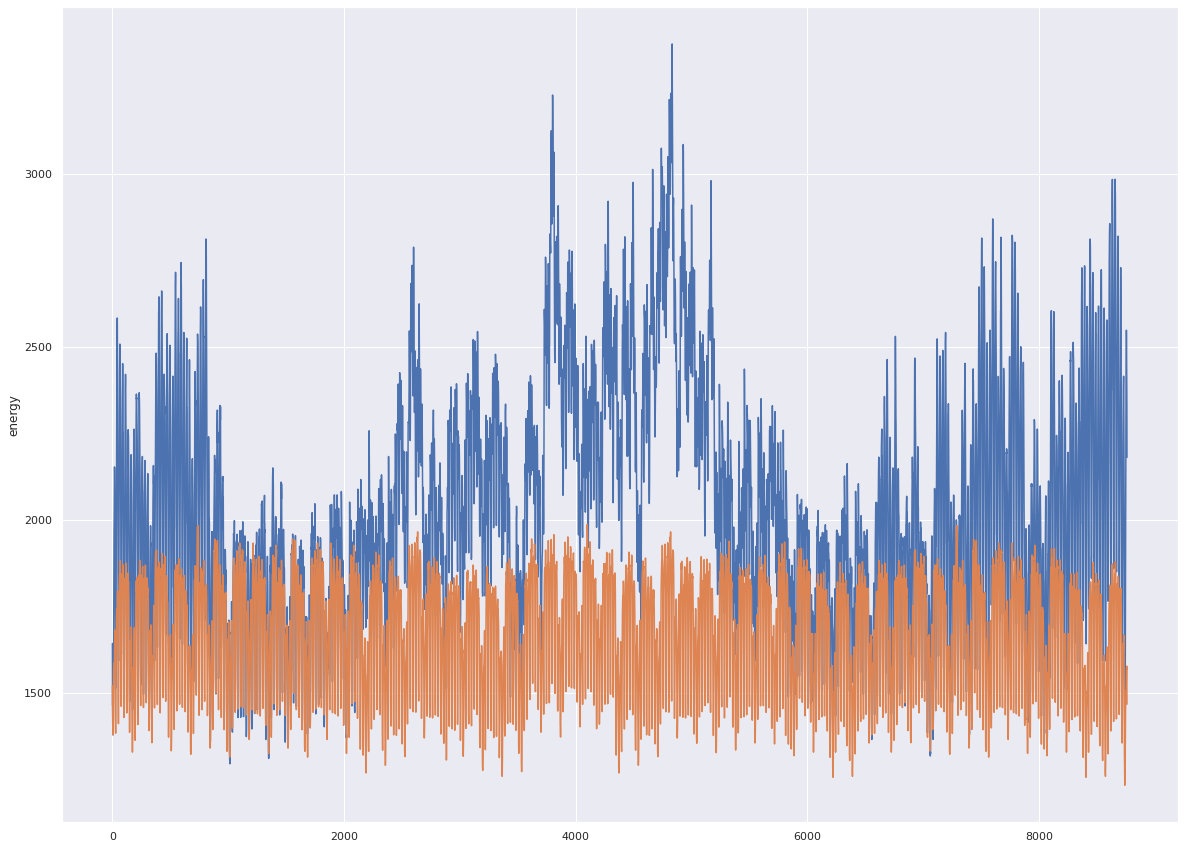

In [105]:
plt.figure(figsize=(20,15))
sns.lineplot(data=y_test)
sns.lineplot(data=predicted_train)
plt.show()

In [106]:
criterion = ["squared_error"]       
n_estimators = [200, 300, 500,1000]       
max_features = ['auto', 'sqrt']     
max_depth = [5, 10, 20]      
max_depth.append(None)     
params = {'criterion': criterion,
          'n_estimators': n_estimators,
          'max_features': max_features,
          'max_depth': max_depth}

In [107]:
gs=GridSearchCV(model, param_grid=params , cv=10, verbose=2)
gs.fit(x_train,y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   4.3s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   3.4s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   3.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   3.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   3.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   3.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   2.9s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   3.0s
[CV] END criterion=squared_error, max_depth=5, max_features=auto, n_estimators=200; total time=   3.1s
[CV] END c

GridSearchCV(cv=10,
             estimator=RandomForestRegressor(n_estimators=1000, n_jobs=-1,
                                             random_state=42),
             param_grid={'criterion': ['squared_error'],
                         'max_depth': [5, 10, 20, None],
                         'max_features': ['auto', 'sqrt'],
                         'n_estimators': [200, 300, 500, 1000]},
             verbose=2)

In [108]:
gs.best_estimator_

RandomForestRegressor(max_depth=5, n_estimators=200, n_jobs=-1, random_state=42)

In [109]:
gs.best_score_

-0.43054808346864765

In [110]:
gs.score(x_train,y_train)

0.21311026435687608

In [111]:
gs_predicted_train=gs.predict(x_train)
gs_predicted_test=gs.predict(x_test)

In [112]:
print("R2 train best", r2_score(y_train,gs_predicted_train))
print("R2 test best", r2_score(y_test,gs_predicted_test))

R2 train best 0.2131102643568763
R2 test best -0.8113143359257586


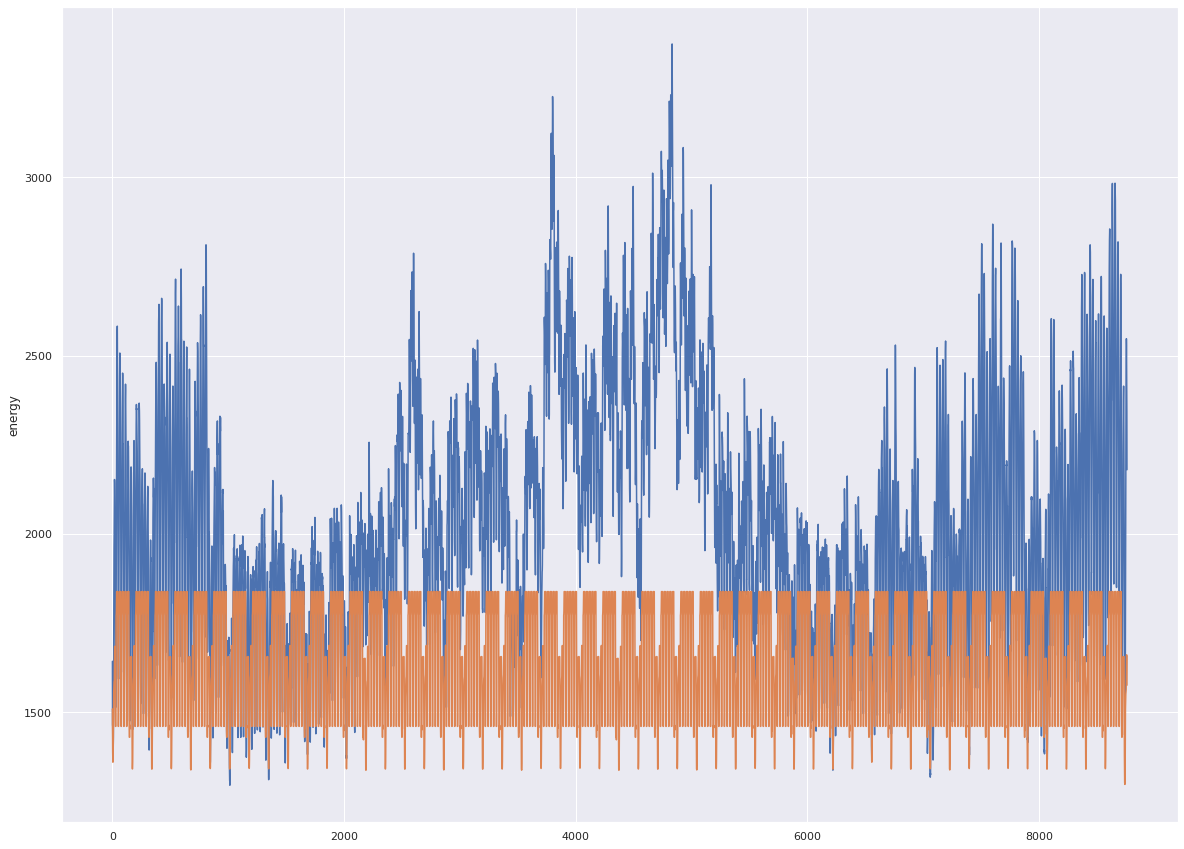

In [114]:
plt.figure(figsize=(20,15))
sns.lineplot(data=y_test)
sns.lineplot(data=gs_predicted_test)
plt.show()